# Project 1: SAT & ACT Analysis

## Problem Statement

The Scholastic Assessment Test (SAT) and the American College Testing (ACT) are two widely used standardized testing methods for college admissions in the United States. As members of the College Board, our organization has been responsible for the development and administration of the SAT since its inception in 1926.

In an effort to more closely align the SAT to reflect the problems encountered by high-school students during class, our SAT has undergone changes in 2016 to meet these goals. To improve student participation and combat perceived advantages in expensive SAT Test Preparation, the College Board has also partnered with the Khan Academy to provide free online SAT practice problems and video classes.

Therefore, to further expand the reach of SAT in US high-schools, our team has been tasked to study and propose 1 US state for the College Board to target SAT promotion efforts. Using the SAT 2017/18 and ACT 2017/18 as initial data, any potential leads should be further investigated using external data. Finally, our findings and recommendations should be presented to the College Board in a non-technical setting.

## Executive Summary

### Contents:
- [2017 Data Import and Cleaning](#2017-Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Data-Visualization)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

#### Libraries used for this analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

%matplotlib inline

## 2017 Data Import and Cleaning

### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
df_sat2017 = pd.read_csv("./data/sat_2017.csv") ### These didn't run out of the box because of the way you arranged folders.
df_act2017 = pd.read_csv("./data/act_2017.csv") ### Since data is in the same directory as the the notebook, the path name 
                                                ### is ./data/sat_2017.csv (current directory) instead of ../ which refers
                                                ### to the parent directory. (try cd ../ in command prompt)

### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [3]:
df_sat2017.head(10)   # SAT 2017

,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [4]:
df_act2017.head(10)   # ACT 2017

,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

### <span style="color:red">Answer:</span>

These 2 datasets contains the results of the SAT/ACT participation rates/mean-scores at the individual US state levels.

a) For the SAT scores (sat_2017.csv), the data covers the entire 50 US states + the District of Columbia (DC) region. Individual rows include the state-wide SAT participation rates (%) of high-school students in that year, as well as the breakdown of the state's mean EBRW and Math component scores. Cumulative SAT scores are also presented (EBRW + Math scores).

b) For the ACT scores (act_2017.csv), the data covers all 50 US states, the DC region, as well as a "National" US-wide value of the ACT score. The breakdown of data includes the ACT state-wide participation rate (%), state-average test-scores (English / Math / Reading / Science), and a overall state-average "Composite" score (derived by getting the mean of ACT English / Math / Reading / Science scores).


### 4a. Does the data look complete? 

### <span style="color:red">Answer:</span>
    
Application of the .info() function did not reveal any missing datapoints. Therefore, these datasets appear to be complete.

In [5]:
df_sat2017.info()   # Checking for missing values in SAT 2017 scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [6]:
df_act2017.info()   # Checking for missing values in ACT 2017 scores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 7 columns):
State            52 non-null object
Participation    52 non-null object
English          52 non-null float64
Math             52 non-null float64
Reading          52 non-null float64
Science          52 non-null float64
Composite        52 non-null object
dtypes: float64(4), object(3)
memory usage: 3.0+ KB


### 4b. Are there any obvious issues with the observations?
### What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

### <span style="color:red">Answer:</span>

1) The SAT contains: a) Reading/Writing component, and b) Math section. Scores from each component will range from 200-800 (min-max), and the addition of both components will give the final SAT score of between 400-1600 (min-max).

2) The ACT is made up of 4 sections (English, Math, Reading, Science), with individual section scores ranging from 1-36 (min-max). The final, or "Composite" score, is the final ACT score. This final result is derived by taking the average score of the 4 ACT sections.

In [7]:
df_sat2017.describe()   # Assessing the SAT 2017 data using .describe()

,Evidence-Based Reading and Writing,Math,Total
count,51.000000,51.000000,51.000000
mean,569.117647,547.627451,1126.098039
std,45.666901,84.909119,92.494812
min,482.000000,52.000000,950.000000
25%,533.500000,522.000000,1055.500000
50%,559.000000,548.000000,1107.000000
75%,613.000000,599.000000,1212.000000
max,644.000000,651.000000,1295.000000


In [8]:
df_act2017.describe()   # Assessing the ACT 2017 data using .describe()

,English,Math,Reading,Science
count,52.000000,52.000000,52.000000,52.000000
mean,20.919231,21.173077,22.001923,21.040385
std,2.332132,1.963602,2.048672,3.151113
min,16.300000,18.000000,18.100000,2.300000
25%,19.000000,19.400000,20.475000,19.900000
50%,20.550000,20.900000,21.700000,21.150000
75%,23.300000,23.100000,24.125000,22.525000
max,25.500000,25.300000,26.000000,24.900000


### <span style="color:red">Answer:</span>
Given these information, it was observed that several datapoints fall out of the expected SAT / ACT test score parameters. Additionally, incorrect datatype formats were also observed. To remedy such issues, the SAT and ACT datasets were cross-referenced with their respective original source for the necessary corrections. These errors are as listed below:

In [9]:
### I'm not sure if you manually checked each row, but a scalable solution would be to simply check the math that 
### they are doing. 

cond = ~((df_sat2017["Total"] - 1 ) <= (df_sat2017["Math"] + df_sat2017["Evidence-Based Reading and Writing"])) & ((df_sat2017["Math"] + df_sat2017["Evidence-Based Reading and Writing"]) <= (df_sat2017["Total"] + 1))
df_sat2017[cond]

### cond is a list of booleans (True/False) which will immediately extract the rows where the math doesn't add up. 
### The +1 and -1 are necessary since they already do some rounding in the presented dataset.

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step. 

### <span style="color:red">Correcting error #1:</span>
Minimum value of the SAT Math component is below the minimum possible score of 200, indicating an error. 
In this case, the state of Maryland's Math score is shown to be 52. The true value is actually 524.

In [10]:
df_sat2017[df_sat2017["Math"] <= 200]   ### Good

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,52,1060


### <span style="color:red">Correcting error #2:</span>
The minimum ACT Science score for the state of Maryland is shown to be 2.3. This is not possible as the final value would be much less than the "Composite" score of 23.6. Checking the reference ACT values, it was revealed that the true ACT Science score in Maryland is 23.2.

In [11]:
df_act2017[df_act2017["Science"] == 2.3]

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,2.3,23.6


### <span style="color:red">Correcting error #3:</span>
The SAT/ACT "Math" values in the state of Maryland is incorrect and needs to be replaced with its original values.

In [12]:
df_sat2017.loc[20, "Math"] = 524   # Correcting Maryland's SAT Math score

In [13]:
df_sat2017[df_sat2017["State"] == "Maryland"]

,State,Participation,Evidence-Based Reading and Writing,Math,Total
20,Maryland,69%,536,524,1060


In [14]:
df_act2017.loc[21, "Science"] = 23.2   # Correcting Maryland's ACT Science score

In [15]:
df_act2017[df_act2017["State"] == "Maryland"] ### This is correct, but inefficient. This creates an entirely
                                              ### new list, then checks all values of the list for the == condition.
                                              ### You're better off using df_act2017.loc[21, :] or df_act2017[21:22]
                                              ### or .iat since you already know the index of Maryland. Both are faster.
                                              ### Check using the code below
                                              ### import timeit 
                                              ### %timeit df_act2017[df_act2017["State"] == "Maryland"]
                                              ### then change the statement to the new ones to look at the speedup 

,State,Participation,English,Math,Reading,Science,Composite
21,Maryland,28%,23.3,23.1,24.2,23.2,23.6


### 5. What are your data types? 
Display the data types of each feature. 

In [16]:
print(df_sat2017.dtypes)   # Datatype of SAT 2017

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


In [17]:
print(df_act2017.dtypes)   # Datatype of ACT 2017

State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


In [18]:
df_act2017[-1:]   # Wrong value type in the "Composite" column in the state of Wyoming

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100%,19.4,19.8,20.8,20.6,20.2x


### What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

### <span style="color:red">Answer:</span>

1) The "Participation" column of both the SAT and ACT datasets were found to be "object" datatypes. As participation rates per state are best represented as "int64", this column should be corrected.

2) While most of the SAT and ACT scores were correctly listed as either "int64" or "float64", it was observed that the "Composite" column of ACT is listed as a "object" datatype. Changing it into a "float64" type would be more appropriate. Manual inspection revealed that the state of Wyoming had a value of 20.2x in the "Composite" column. Based on the reference dataset, this value should be corrected to 20.2.

### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [19]:
#Removing the "%" symbol from the "Participation" column
df_sat2017["Participation"] = df_sat2017["Participation"].map(lambda x: int(x.replace("%","")))
df_act2017["Participation"] = df_act2017["Participation"].map(lambda x: int(x.replace("%","")))

- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#Correcting the correct score for the state of Wyoming
df_act2017.loc[51, "Composite"] = 20.2

In [21]:
df_act2017[-1:]   # Data is now corrected
                  ### Yup, this is the faster way to access individual columns

,State,Participation,English,Math,Reading,Science,Composite
51,Wyoming,100,19.4,19.8,20.8,20.6,20.2


- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
#Converting the "Composite" scores into a "float64" datatype
df_act2017.Composite = df_act2017.Composite.astype("float64")

- Display the data types again to confirm they are correct.

In [23]:
df_act2017.dtypes   # Data has been successfully converted

State             object
Participation      int64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object

### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [24]:
#Changing the column names
df_sat2017.columns = ["state", "sat_part_2017", "sat_ebrw_2017",
                      "sat_math_2017", "sat_total_2017"]
df_act2017.columns = ["state", "act_part_2017", "act_eng_2017", 
                      "act_math_2017", "act_read_2017", "act_sci_2017",
                      "act_comp_2017"]

In [25]:
df_act2017.dtypes   # Column names has been properly renamed

state             object
act_part_2017      int64
act_eng_2017     float64
act_math_2017    float64
act_read_2017    float64
act_sci_2017     float64
act_comp_2017    float64
dtype: object

### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

### <span style="color:red">Answer: Data Dictionary for 2017</span>

|Feature|Type|Dataset|Description|
|:-------|---|---|---|
|**state**|object|ACT/SAT|State name within the USA|
|**sat_part_2017**|int64|SAT|State SAT participation rate (%) in 2017|
|**sat_ebwr_2017**|int64|SAT|State average SAT EBRW score in 2017|
|**sat_math_2017**|int64|SAT|State average SAT Math score in 2017|
|**sat_total_2017**|int64|SAT|State average SAT Total score in 2017|
|**act_part_2017**|int64|ACT|State ACT participation rate (%) in 2017|
|**act_eng_2017**|float64|ACT|State average ACT English score in 2017|
|**act_math_2017**|float64|ACT|State average ACT Math score in 2017|
|**act_read_2017**|float64|ACT|State average ACT Reading score in 2017|
|**act_sci_2017**|float64|ACT|State average ACT Science score in 2017|
|**act_comp_2017**|float64|ACT|State average ACT Composite score in 2017|


### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [26]:
#Removing the first row of the ACT 2017 dataset, which refers to the "National" ACT scores.
df_act2017.drop(0, inplace = True)
df_act2017.head()

,state,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
1,Alabama,100,18.9,18.4,19.7,19.4,19.2
2,Alaska,65,18.7,19.8,20.4,19.9,19.8
3,Arizona,62,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100,18.9,19.0,19.7,19.5,19.4
5,California,31,22.5,22.7,23.1,22.2,22.8


### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [27]:
#Combining the 2017 ACT and SAT dataframes using "state" as the key combined_2017.to_csv('../data/combined_2017.csv')

combined_2017 = pd.merge(df_sat2017, df_act2017, on = "state")

In [28]:
combined_2017.head()

,state,sat_part_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
0,Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2
1,Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8
2,Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4
4,California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8


### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [29]:
combined_2017.to_csv('./data/combined_2017.csv')   ### Same as before, had to change to ./ for it to work

# 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

In [30]:
#Importing the 2018 ACT and SAT datasets from CSV.

df_sat2018 = pd.read_csv("./data/sat_2018.csv")     ### I'm changeing all the ../ to ./
df_act2018 = pd.read_csv("./data/act_2018.csv")

In [31]:
#Displaying and checking the dtypes for the ACT and SAT 2018 results.
df_act2018.dtypes   # ACT 2018

State             object
Participation     object
Composite        float64
dtype: object

In [32]:
df_sat2018.dtypes   # SAT 2018

State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object

In [33]:
#Checking for missing values in the 2018 datasets
df_act2018.info()   # ACT 2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 3 columns):
State            52 non-null object
Participation    52 non-null object
Composite        52 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.3+ KB


In [34]:
df_sat2018.info()   # SAT 2018

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
State                                 51 non-null object
Participation                         51 non-null object
Evidence-Based Reading and Writing    51 non-null int64
Math                                  51 non-null int64
Total                                 51 non-null int64
dtypes: int64(3), object(2)
memory usage: 2.1+ KB


In [35]:
#Checking for correct max-min values
df_act2018.describe().T   # ACT 2018

,count,mean,std,min,25%,50%,75%,max
Composite,52.0,21.544231,2.119417,17.7,19.975,21.3,23.725,25.6


In [36]:
df_sat2018.describe().T  # SAT 2018

,count,mean,std,min,25%,50%,75%,max
Evidence-Based Reading and Writing,51.0,563.686275,47.502627,480.0,534.5,552.0,610.5,643.0
Math,51.0,556.235294,47.772623,480.0,522.5,544.0,593.5,655.0
Total,51.0,1120.019608,94.155083,977.0,1057.5,1098.0,1204.0,1298.0


### <span style="color:red">Answer:</span>

1) There are no missing values within the datasets, however, the number of "State" rows between the SAT and ACT 2018 scores are not similar (51 vs 52). Manual inspection revealed a duplicate ACT row from the state of Maine. This duplicate value has to be removed.

2) Manual curation of the 2018 SAT data from the College Board's published website revealed two errors in the state's SAT participation rates. These are the states of Florida (true value: 97%) and Indiana (true value: 67%). These values have to be corrected.

3) The 2018 ACT and SAT "Participation" column is an object datatype. To allow for the merging of the 2017/2018 data, this "Participation" column has to be converted to a "float64" datatype.

### <span style="color:red">Correcting error #1: Removing duplicate entries</span>

In [37]:
# Removing duplicate rows
df_act2018[df_act2018["State"] == "Maine"]

,State,Participation,Composite
19,Maine,7%,24.0
20,Maine,7%,24.0


In [38]:
# Removing the duplicate "Maine" rows
df_act2018.drop(19, inplace = True)
df_act2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 0 to 51
Data columns (total 3 columns):
State            51 non-null object
Participation    51 non-null object
Composite        51 non-null float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


### <span style="color:red">Correcting error #2: Replacing wrong SAT participation values</span>

In [39]:
df_sat2018.loc[9, "Participation"] = "97%"  # Correcting for Florida (row index is 9)
df_sat2018.loc[14, "Participation"] = "67%" # Correcting for Indiana (row index is 14)

In [40]:
df_sat2018.loc[9]    # The participation value is now correct

State                                 Florida
Participation                             97%
Evidence-Based Reading and Writing        550
Math                                      549
Total                                    1099
Name: 9, dtype: object

In [41]:
df_sat2018.loc[14]    # The participation value is now correct

State                                 Indiana
Participation                             67%
Evidence-Based Reading and Writing        542
Math                                      532
Total                                    1074
Name: 14, dtype: object

### <span style="color:red">Correcting error #3: Changing object to int64 datatype</span>

In [42]:
# Removing the "%" symbol and converting the 2018 "Participation" column into "int64" datatype.
df_act2018["Participation"] = df_act2018["Participation"].map(lambda x: int(x.replace("%", "")))
df_sat2018["Participation"] = df_sat2018["Participation"].map(lambda x: int(x.replace("%", "")))

In [43]:
df_act2018.dtypes

State             object
Participation      int64
Composite        float64
dtype: object

### <span style="color:red">Correcting error #4: Changing the column names for merging</span>

In [44]:
#Changing the column names
df_sat2018.columns = ["state", "sat_part_2018", "sat_ebrw_2018", "sat_math_2018", "sat_total_2018"]
df_act2018.columns = ["state", "act_part_2018", "act_comp_2018"]

In [45]:
#Combining the 2018 ACT and SAT dataframes using "state" as the key combined_2018.to_csv('../data/combined_2018.csv')
combined_2018 = pd.merge(df_sat2018, df_act2018, on = "state")

In [46]:
combined_2018.head()

,state,sat_part_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
0,Alabama,6,595,571,1166,100,19.1
1,Alaska,43,562,544,1106,33,20.8
2,Arizona,29,577,572,1149,66,19.2
3,Arkansas,5,592,576,1169,100,19.4
4,California,60,540,536,1076,27,22.7


In [47]:
combined_2018.to_csv('./data/combined_2018.csv')

### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [48]:
# Combining the full 2017 and full 2018 ACT/SAT dataframes

final = pd.merge(combined_2017, combined_2018, on = "state")

In [49]:
# Setting the state as the dataframe index

final = final.set_index("state")

In [50]:
final.head()

,sat_part_2017,sat_ebrw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_ebrw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
state,,,,,,,,,,,,,,,,
Alabama,5,593,572,1165,100,18.9,18.4,19.7,19.4,19.2,6,595,571,1166,100,19.1
Alaska,38,547,533,1080,65,18.7,19.8,20.4,19.9,19.8,43,562,544,1106,33,20.8
Arizona,30,563,553,1116,62,18.6,19.8,20.1,19.8,19.7,29,577,572,1149,66,19.2
Arkansas,3,614,594,1208,100,18.9,19.0,19.7,19.5,19.4,5,592,576,1169,100,19.4
California,53,531,524,1055,31,22.5,22.7,23.1,22.2,22.8,60,540,536,1076,27,22.7


In [51]:
final.to_csv('./data/final.csv')

### <span style="color:red">Answer: Creating a combined Data Dictionary</span>

|Feature|Type|Dataset|Description|
|:-------|---|---|---|
|**state**|object|ACT/SAT|State name within the USA|
|**sat_part_2017**|int64|SAT|State SAT participation rate (%) in 2017|
|**sat_ebwr_2017**|int64|SAT|State average SAT EBRW score in 2017|
|**sat_math_2017**|int64|SAT|State average SAT Math score in 2017|
|**sat_total_2017**|int64|SAT|State average SAT Total score in 2017|
|**act_part_2017**|int64|ACT|State ACT participation rate (%) in 2017|
|**act_eng_2017**|float64|ACT|State average ACT English score in 2017|
|**act_math_2017**|float64|ACT|State average ACT Math score in 2017|
|**act_read_2017**|float64|ACT|State average ACT Reading score in 2017|
|**act_sci_2017**|float64|ACT|State average ACT Science score in 2017|
|**act_comp_2017**|float64|ACT|State average ACT Composite score in 2017|
|**sat_part_2018**|int64|SAT|State SAT participation rate (%) in 2018|
|**sat_ebwr_2018**|int64|SAT|State average SAT EBRW score in 2018|
|**sat_math_2018**|int64|SAT|State average SAT Math score in 2018|
|**sat_total_2018**|int64|SAT|State average SAT Total score in 2018|
|**act_part_2018**|int64|ACT|State ACT participation rate (%) in 2018|
|**act_comp_2018**|float64|ACT|State average ACT Composite score in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [52]:
final.describe().T   ### Good idea transposing the Dataframe

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat_ebrw_2017,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat_math_2017,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat_total_2017,50.0,1129.620,89.913085,996.0,1057.000,1107.50,1214.000,1295.0
act_part_2017,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act_eng_2017,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act_math_2017,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act_read_2017,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act_sci_2017,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9
act_comp_2017,50.0,21.466,2.004241,17.8,19.800,21.40,23.400,25.5


### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [53]:
def standard_deviation(values):
    mean = sum(values) / len(values)    
    x = 0
    for i in values:                      ### Usually use i,j,k for indices, not elements. 
        x += ((i - mean)**2)              ### eg for i in range(len(values)), x += ((values[i] - mean)**2) 
    stdev  = (x/len(values))**0.5         ### Something like v for values would be a bit clearer
    return stdev

In [54]:
values = [10,9,8,7,6,5,4,3,2,1]   # Number list for testing

In [55]:
standard_deviation(values)

2.8722813232690143

In [56]:
# Validating standard_deviation function using numpy

np.std(values)                          ### Reminder that the default setting for np.std is ddof=0 

2.8722813232690143

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [57]:
sd = {k: standard_deviation(final[k]) for k in final.columns}   ### Good
sd

{'sat_part_2017': 34.21286307808804,
 'sat_ebrw_2017': 43.9390532442382,
 'sat_math_2017': 45.37911854586864,
 'sat_total_2017': 89.00941298536914,
 'act_part_2017': 31.787947401491657,
 'act_eng_2017': 2.3009467616613812,
 'act_math_2017': 1.9541504548012678,
 'act_read_2017': 2.025750231395766,
 'act_sci_2017': 1.7145553359399048,
 'act_comp_2017': 1.9840977798485642,
 'sat_part_2018': 37.45773084424629,
 'sat_ebrw_2018': 46.537937212558106,
 'sat_math_2018': 46.51518461749884,
 'sat_total_2018': 91.91248881408882,
 'act_part_2018': 33.7712540483767,
 'act_comp_2018': 2.090091864009809}

### Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

### <span style="color:red">Answer:</span>

Yes and no. The manually calculated standard deviation matches the output from numpy's ```std``` method, but not from pandas ```describe```.

This is because numpy's ```std``` uses the "uncorrected" standard deviation formula with sample-size (N):

![alt_text](https://wikimedia.org/api/rest_v1/media/math/render/svg/bad80ea0e24daf81761136ee19f8e46b7c7a7628)

While, pandas ```describe``` uses the "corrected" standard deviation formula with sample-sze (N-1):

![alt_text](https://wikimedia.org/api/rest_v1/media/math/render/svg/1bffdcb1ecd0b326bb7ad67397b073af9c15fa6e)

In [58]:
### I'm disappointed that you used an image from wikipedia instead of typing out the LaTeX in markdown.
### For the equation to display properly in latex, you need the following line. 
### $$ s =\sqrt {{\frac {1}{N-1}}\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}$$
### This will display the equation properly as shown below.
### Most formulas in wikipedia are typeset in LaTeX, and can be copied by viewing the HTML source code.

$$ s =\sqrt {{\frac {1}{N-1}}\sum _{i=1}^{N}(x_{i}-{\overline {x}})^{2}}$$

In [59]:
final.describe().T  # Standard deviation using panda's describe does not match

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,50.0,38.600,34.560211,2.0,4.000,34.00,65.000,100.0
sat_ebrw_2017,50.0,570.860,44.385146,503.0,535.250,559.50,613.500,644.0
sat_math_2017,50.0,558.660,45.839832,492.0,524.000,549.50,601.000,651.0
sat_total_2017,50.0,1129.620,89.913085,996.0,1057.000,1107.50,1214.000,1295.0
act_part_2017,50.0,65.920,32.110676,8.0,31.000,71.00,100.000,100.0
act_eng_2017,50.0,20.862,2.324307,16.3,19.000,20.55,23.100,25.5
act_math_2017,50.0,21.136,1.973990,18.0,19.400,20.90,23.000,25.3
act_read_2017,50.0,21.956,2.046317,18.1,20.425,21.70,23.875,26.0
act_sci_2017,50.0,21.410,1.731962,18.2,19.925,21.30,22.975,24.9
act_comp_2017,50.0,21.466,2.004241,17.8,19.800,21.40,23.400,25.5


In [60]:
np.std(final)   # Standard deviation using numpy's std method gives a match

sat_part_2017     34.212863
sat_ebrw_2017     43.939053
sat_math_2017     45.379119
sat_total_2017    89.009413
act_part_2017     31.787947
act_eng_2017       2.300947
act_math_2017      1.954150
act_read_2017      2.025750
act_sci_2017       1.714555
act_comp_2017      1.984098
sat_part_2018     37.457731
sat_ebrw_2018     46.537937
sat_math_2018     46.515185
sat_total_2018    91.912489
act_part_2018     33.771254
act_comp_2018      2.090092
dtype: float64

### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

### Q1: Which states have the highest/lowest participation rates for the SAT in 2017/2018

### <span style="color:red">SAT 2017 Participation:</span>
- **Highest**: Michigan, Connecticut, Delaware, New Hampshire, Maine
- **Lowest**: North Dakota, Mississippi, Iowa, Missouri, Utah

In [61]:
# States with the highest 2017 SAT participation rates
final.sort_values("sat_part_2017", ascending = False)["sat_part_2017"].head()

state
Michigan         100
Connecticut      100
Delaware         100
New Hampshire     96
Maine             95
Name: sat_part_2017, dtype: int64

In [62]:
# States with the lowest 2017 SAT participation rates
final.sort_values("sat_part_2017", ascending = True)["sat_part_2017"].head()

state
North Dakota    2
Mississippi     2
Iowa            2
Missouri        3
Utah            3
Name: sat_part_2017, dtype: int64

### <span style="color:red">SAT 2018 Participation</span>
- **Highest**: Michigan, Connecticut, Delaware, New Hampshire, Maine
- **Lowest**: North Dakota, Mississippi, Iowa, Missouri, Utah

In [63]:
# States with the highest 2018 SAT participation rates
final.sort_values("sat_part_2018", ascending = False)["sat_part_2018"].head()

state
Michigan       100
Colorado       100
Connecticut    100
Delaware       100
Idaho          100
Name: sat_part_2018, dtype: int64

In [64]:
# States with the lowest 2018 ACT participation rates
final.sort_values("sat_part_2018", ascending = True)["sat_part_2018"].head()

state
North Dakota    2
Wyoming         3
South Dakota    3
Nebraska        3
Wisconsin       3
Name: sat_part_2018, dtype: int64

### <span style="color:red">ACT 2017 Participation:</span>
- **Highest**: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, North Carolina, Nevada, Missouri, Mississippi, Minnesota, Louisiana, Montana, Wyoming, Arkansas, Colorado (all equal at 100%)

- **Lowest**: Maine, Delaware, New Hampshire

In [65]:
# States with the highest 2017 ACT participation rates
final.sort_values("act_part_2017", ascending = False)["act_part_2017"].head()

state
Alabama      100
Kentucky     100
Wisconsin    100
Utah         100
Tennessee    100
Name: act_part_2017, dtype: int64

In [66]:
# States with the lowest 2017 ACT participation rates
final.sort_values("act_part_2017", ascending = False)["act_part_2017"].tail()

state
Pennsylvania     23
Rhode Island     21
New Hampshire    18
Delaware         18
Maine             8
Name: act_part_2017, dtype: int64

### <span style="color:red">ACT 2018 Participation:</span>

- **Highest**: Alabama, Kentucky, Wisconsin, Utah, Tennessee, South Carolina, Oklahoma, Ohio, North Carolina, Nevada, Nebraska, Missouri, Mississippi, Louisiana, Montana, Wyoming, Arkansas (all equal at 100%)
- **Lowest**: Maine, Rhode Island, New Hampshire, Delaware

In [67]:
# Viewing the states with the highest 2018 ACT participation rates
final.sort_values("act_part_2018", ascending = False)["act_part_2018"].head()

state
Alabama      100
Kentucky     100
Wisconsin    100
Utah         100
Tennessee    100
Name: act_part_2018, dtype: int64

In [68]:
# Viewing the states with the lowest 2018 ACT participation rates
final.sort_values("act_part_2018", ascending = True)["act_part_2018"].head()

state
Maine             7
Rhode Island     15
New Hampshire    16
Delaware         17
Pennsylvania     20
Name: act_part_2018, dtype: int64

### Q2: Which states have the highest/lowest SAT scores in 2017/2018

### <span style="color:red">SAT 2017 scores</span>
- **Highest**: Minnesota, Wisconsin, Iowa
- **Lowest**: Delaware, Michigan, Idaho

In [69]:
# States with the highest 3 SAT 2017 combined scores
final.sort_values("sat_total_2017", ascending = False)["sat_total_2017"].head(3)

state
Minnesota    1295
Wisconsin    1291
Iowa         1275
Name: sat_total_2017, dtype: int64

In [70]:
# States with the lowest 3 SAT 2017 combined scores
final.sort_values("sat_total_2017", ascending = False)["sat_total_2017"].tail(3)

state
Idaho       1005
Michigan    1005
Delaware     996
Name: sat_total_2017, dtype: int64

### <span style="color:red">SAT 2018 scores</span>
- **Highest**: Minnesota, Wisconsin, North Dakota
- **Lowest**: Delaware, West Virginia, Idaho

In [71]:
# States with the top 3 SAT 2018 combined scores
final.sort_values("sat_total_2018", ascending = False)["sat_total_2018"].head(3)

state
Minnesota       1298
Wisconsin       1294
North Dakota    1283
Name: sat_total_2018, dtype: int64

In [72]:
# States with the lowest 3 SAT 2018 combined scores
final.sort_values("sat_total_2018", ascending = False)["sat_total_2018"].tail(3)

state
Idaho            1001
West Virginia     999
Delaware          998
Name: sat_total_2018, dtype: int64

### <span style="color:red">ACT 2017 scores</span>
- **Highest**: New Hampshire, Massachusetts, Connecticut
- **Lowest**: Nevada, Mississippi, South Carolina

In [73]:
# States with the top 3 ACT 2017 combined scores
final.sort_values("act_comp_2017", ascending = False)["act_comp_2017"].head(3)

state
New Hampshire    25.5
Massachusetts    25.4
Connecticut      25.2
Name: act_comp_2017, dtype: float64

In [74]:
# States with the top 3 ACT 2017 combined scores
final.sort_values("act_comp_2017", ascending = False)["act_comp_2017"].tail(3)

state
South Carolina    18.7
Mississippi       18.6
Nevada            17.8
Name: act_comp_2017, dtype: float64

### <span style="color:red">ACT 2018 scores</span>
- **Highest**: Connecticut, Massachusetts, New Hampshire
- **Lowest**: Nevada, South Carolina, Mississippi

In [75]:
# States with the top 3 ACT 2018 combined scores
final.sort_values("act_comp_2018", ascending = False)["act_comp_2018"].head(3)

state
Connecticut      25.6
Massachusetts    25.5
New Hampshire    25.1
Name: act_comp_2018, dtype: float64

In [76]:
# States with the top 3 ACT 2018 combined scores
final.sort_values("act_comp_2018", ascending = False)["act_comp_2018"].tail(3)

state
Mississippi       18.6
South Carolina    18.3
Nevada            17.7
Name: act_comp_2018, dtype: float64

### Q3: Do states with 100% enrollment have year-to-year parcipation rate changes?

### <span style="color:red">SAT participation changes</span>
- Three states in 2017 which had 100% SAT participation (Connecticut, Delaware, Michigan) continued to maintain full 100% levels in the 2018 SAT.
- Interestingly, two other states (Colorado, Idaho) managed to achieve full 100% participation rate in the 2018 SAT, despite not being able to do so in 2017.

In [77]:
# Year-to-year changes in states with 100% SAT participation in 2017
state_100sat2017 = final.loc[final["sat_part_2017"] == 100].index
final.loc[state_100sat2017, ["sat_part_2017","sat_part_2018"]]        ### Good

,sat_part_2017,sat_part_2018
state,,
Connecticut,100,100
Delaware,100,100
Michigan,100,100


In [78]:
# Year-to-year changes in states with 100% SAT participation in 2018
state_100sat2018 = final.loc[(final["sat_part_2018"] == 100) & (final["sat_part_2017"] != 100)].index
final.loc[state_100sat2018, ["sat_part_2017","sat_part_2018"]]

,sat_part_2017,sat_part_2018
state,,
Colorado,11,100
Idaho,93,100


### <span style="color:red">ACT participation changes</span>
- 17 states which had 100% ACT participation in 2017 continued to do so for the 2018 ACT.
- 2 new states (Nebraska, Ohio), managed to achieve full 100% participation rate in the 2018 ACT, despite not being able to do so in 2017.

In [79]:
# Year-to-year changes in states with 100% ACT participation in 2017
state_100act2017 = final.loc[final["act_part_2017"] == 100].index

final.loc[state_100act2017,["act_part_2017","act_part_2018"]]

,act_part_2017,act_part_2018
state,,
Alabama,100,100
Arkansas,100,100
Colorado,100,30
Kentucky,100,100
Louisiana,100,100
Minnesota,100,99
Mississippi,100,100
Missouri,100,100
Montana,100,100


In [80]:
# Year-to-year changes in states with 100% ACT participation in 2018
state_100act2018 = final.loc[(final["act_part_2018"] == 100) & (final["act_part_2017"] != 100)].index

final.loc[state_100act2018,["act_part_2017","act_part_2018"]]

,act_part_2017,act_part_2018
state,,
Nebraska,84,100
Ohio,75,100


### Q4: Do any states achieve >50% test participation in both SAT/ACT in 2017-2018?

### <span style="color:red">States with more than 50% SAT/ACT participation</span>
- 2017: Florida, Georgia, Hawaii, South Carolina
- 2018: Florida, Georgia, Hawaii, North Carolina, South Carolina

In [81]:
# States with more than 50% SAT/ACT participation in 2017
final.loc[(final["sat_part_2017"] >= 50) & (final["act_part_2017"] >= 50), ["sat_part_2017", "act_part_2017"]]

,sat_part_2017,act_part_2017
state,,
Florida,83,73
Georgia,61,55
Hawaii,55,90
South Carolina,50,100


In [82]:
# States with more than 50% SAT/ACT participation in 2018
final.loc[(final["sat_part_2018"] >= 50) & (final["act_part_2018"] >= 50), ["sat_part_2018", "act_part_2018"]]

,sat_part_2018,act_part_2018
state,,
Florida,97,66
Georgia,70,53
Hawaii,56,89
North Carolina,52,100
South Carolina,55,100


## Data Visualization

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

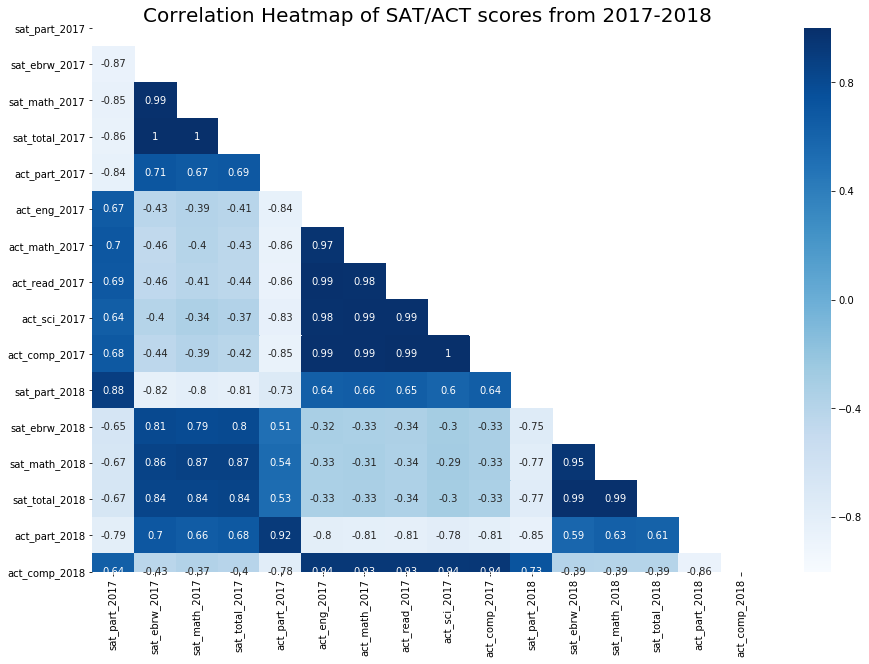

In [83]:
# Setting the figure size
plt.subplots(figsize=(15,10))
plt.title("Correlation Heatmap of SAT/ACT scores from 2017-2018", fontsize = 20)

# Creating the mask
mask = np.zeros_like(final.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Plotting the correlation heatmap
graph = sns.heatmap(final.corr(), mask=mask, annot=True, annot_kws={"size":10}, vmin=-1, vmax=1, cmap="Blues");

### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [84]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(12, 8)) # You'll want to specify your figsize
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column], bins=10) # feel free to add more settings
        ax[i].set_title(list_of_titles[i], fontsize =18)
        ax[i].set_ylabel('No. of States',fontsize=12)
        ax[i].set_xlabel(list_of_xlabels,fontsize=12)
        ax[i].locator_params(axis='y', integer=True)

### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

### <span style="color:red">Participation rates for SAT and ACT</span>

- **SAT**: State participation for SAT ranges widely from single-digit to 100% enrollment. From the SAT histogram, it can be observed that there is a sizable portion of states that have poor SAT participation rates.

- **ACT**: From the ACT histogram, ACT participation also ranges widely from single-digit to 100% enrollment. However, it is observed that more US states have full 100% ACT participation.

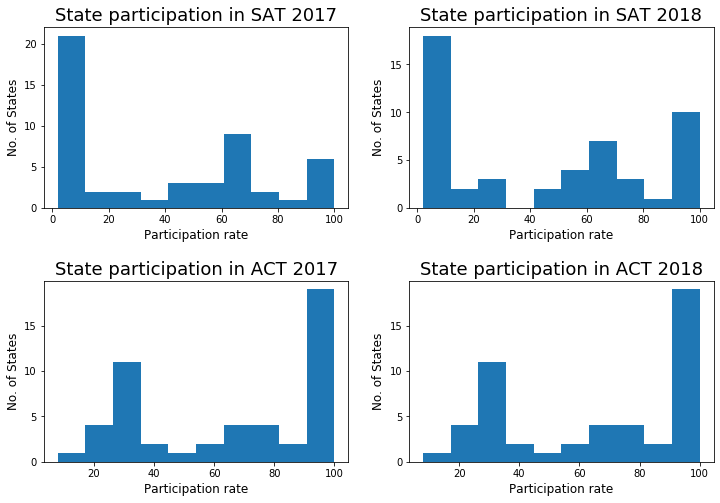

In [85]:
subplot_histograms(final, ["sat_part_2017", "sat_part_2018", "act_part_2017", "act_part_2017"],
                   ["State participation in SAT 2017", "State participation in SAT 2018", 
                    "State participation in ACT 2017", "State participation in ACT 2018" ],
                   "Participation rate")

### <span style="color:red">Math scores for SAT and ACT</span>

- **SAT**: Math scores range from approximately 500-650. Distribution of math scores is not normal, and appear to be bimodal.

- **ACT**: Math scores range from around 18-25. Similar to SAT, the distribution of ACT math scores is not nomal, an appears to be bimodally distributed.

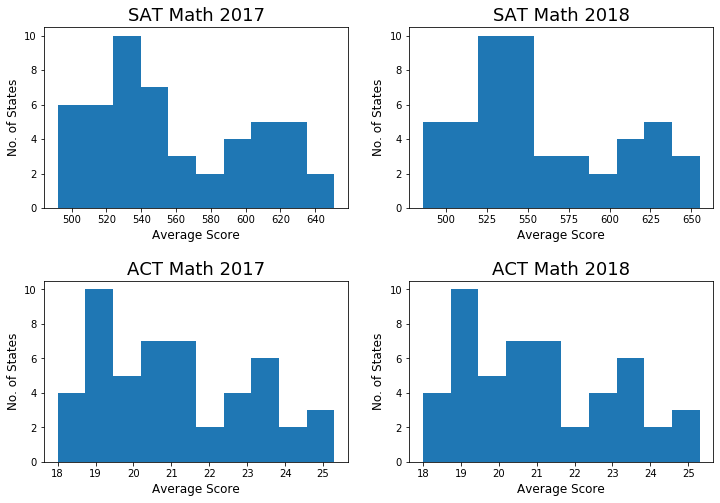

In [86]:
subplot_histograms(final, ["sat_math_2017", "sat_math_2018", "act_math_2017", "act_math_2017"],
                   ["SAT Math 2017", "SAT Math 2018", "ACT Math 2017", "ACT Math 2018"],
                   "Average Score")

In [87]:
### It's difficult to compare across SAT scores when the two plots don't share the same x-axis scaling.
### Scaling should be consistent for comparison to be meaningful.
### The additional kwarg (keyword argument) that needs to be specified in the function
### should be plt.subplots(..., sharex='row') for it to share the x-axes across subplot rows.

### <span style="color:red">Reading/Verbal scores for SAT and ACT</span>
- **SAT**: EBRW scores range from approximately 500-650. Distribution of these scores appears to be bimodal in nature.

- **ACT**: English scores range from 16-25, while Reading scores range from 18-26. The distribution in this case does not appear to be normal.

In [88]:
import seaborn as sns
sns.__version__

'0.9.0'

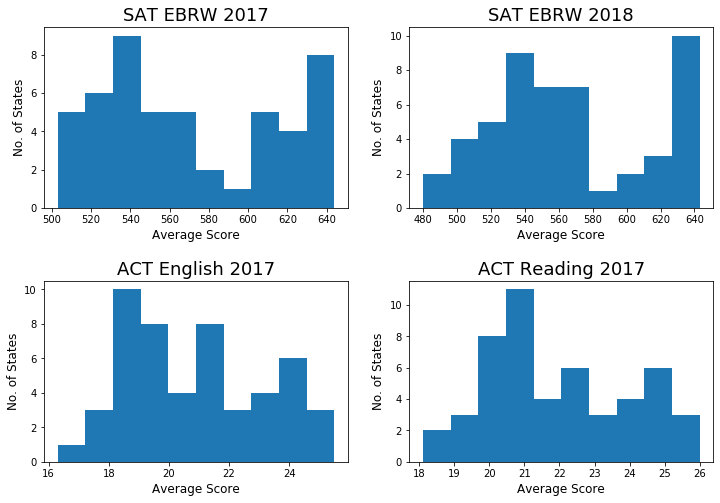

In [89]:
subplot_histograms(final, ["sat_ebrw_2017", "sat_ebrw_2018", "act_eng_2017", "act_read_2017"],
                   ["SAT EBRW 2017", "SAT EBRW 2018", "ACT English 2017", "ACT Reading 2017"],
                   "Average Score")

In [90]:
### Same issue here with regards to x-axis scaling.
### ACT differences particularly glaring

### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [91]:
def scatter(dataframe, x_data, y_data):
    nrows = int(np.ceil(len(x_data)/2)) # Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize=(15,5*nrows)) # You'll want to specify your figsize
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=0.4)
    
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate

    if len(x_data) %2 !=0:   # Removes any empty boxes
        ax[len(x_data)].set_visible(False)
                
    for i in range(len(x_data)): # Gives us an index value to get into all our lists
        sns.scatterplot(data=dataframe, x=x_data[i], y=y_data[i], ax = ax[i])
        ax[i].set_title(str(x_data[i] + " vs. " + str(y_data[i])), fontsize =18)
        ax[i].set_ylabel(str(y_data[i]) + " scores", fontsize=12)
        ax[i].set_xlabel(str(x_data[i]) + " scores", fontsize=12)
        ax[i].locator_params(axis='y', integer=True)

### <span style="color:red">Using Scatterplot to interprete data</span>

#### <span style="color:red">SAT vs ACT Math/Verbal scores in 2017</span>
- No discernable relationships were observed between the 1) SAT/ACT Math, or 2) SAT/ACT Verbal-Reading scores using the Scatterplot visualization method.

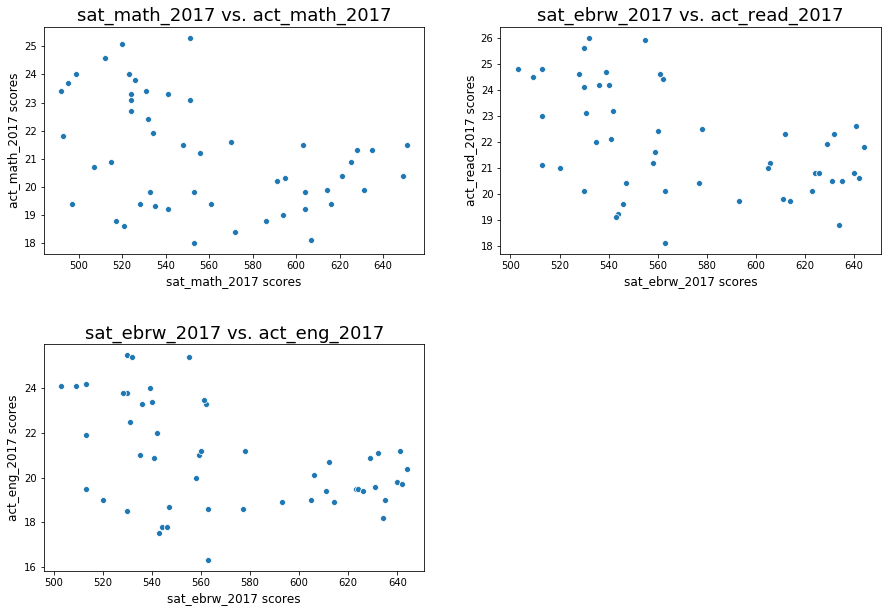

In [92]:
scatter(final,["sat_math_2017", "sat_ebrw_2017", "sat_ebrw_2017"], ["act_math_2017","act_read_2017", "act_eng_2017"])

#### <span style="color:red">SAT vs ACT Total scores in 2017</span>
- Similar to the comparison between SAT/ACT individual components, no discernable relationships were found when comparing the total SAT vs ACT scores.

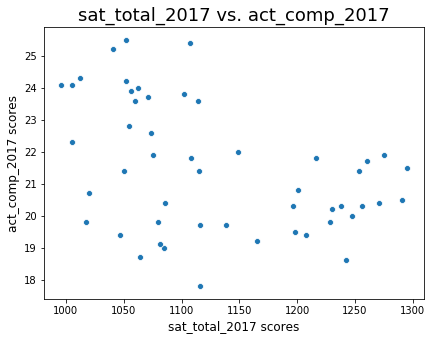

In [88]:
scatter(final,["sat_total_2017"], ["act_comp_2017"])

#### <span style="color:red">SAT 2017 vs SAT 2018 Total Scores</span>
- As expected, a linear relationship is observed between a state's SAT 2017 and SAT 2018 total scores. Interestingly, the scatterplot has revealed several states which have done well in 2017, but failed to continue doing so in 2018.

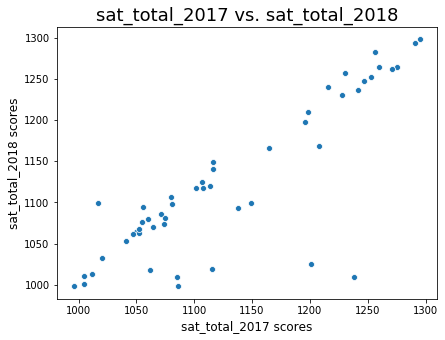

In [89]:
scatter(final,["sat_total_2017"], ["sat_total_2018"])

#### <span style="color:red">ACT 2017 vs ACT 2018 Total Scores</span>
- A linear relationship is also observed between a state's ACT 2017 and ACT 2018 composite score. Two states were found to have an improved composite score in 2018.

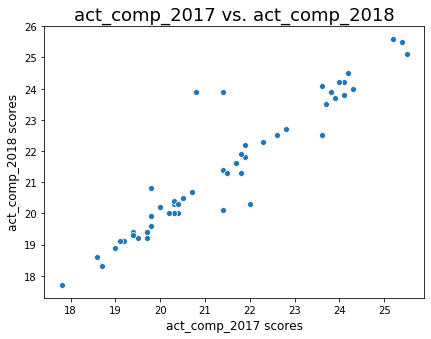

In [90]:
scatter(final,["act_comp_2017"], ["act_comp_2018"])

In [ ]:
### Correct, but drawing a act_comp_2018 = act_comp_201 y=x line and annotating the outliers would help with 
### the visualisation. States in the region above would have act_comp_2018 > act_comp_2017. Annotation can be
### done using matplotlib.pyplot.annotate (see documentation).

### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

### <span style="color:red">Boxplot for ACT vs SAT data</span>
- From the boxplot, it can be observed that ACT participation rates tends to be higher than those of SAT.
- While the interquartile range for SAT and ACT test scores covers the same region, it can be observed that the median ACT test scores are also higher than the median SAT test scores.

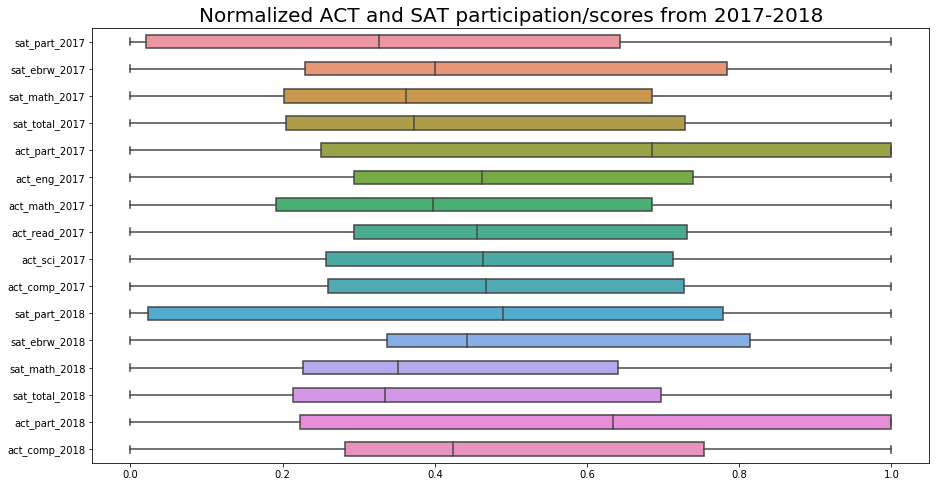

In [103]:
fig, ax = plt.subplots(figsize=(15,8))

# Normalizing the dataset using each column[x] min-max
normalized = pd.DataFrame([(final[x]-final[x].min())/ (final[x].max()-final[x].min()) for x in final]).T

sns.boxplot(data=normalized, width = 0.5, orient = "h")
plt.title("Normalized ACT and SAT participation/scores from 2017-2018",fontsize=20);

In [104]:
### Very pretty, but not sure how useful this will be. Participation should definitely be removed -- they obey
### a completely different metric. Otherwise splitting the data further into year/test might be a better idea
### to reduce clutter. Normalisation also brings some pretty unexpected results: it looks like the mean of 
### sat_total_2018 is lower than both sat_ebrw_2018 and sat_math_2018. An explaination could probably be put
### into captions but it'll be better if it were more obvious from the graphic.

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

### <span style="color:red">Numerical statistical values for SAT/ACT data</span>

- The table below will summarize the statistics on mean, median, standard deviation, Inner Quartile Range, Min/Max, and skew. Normality testing using the **Shapiro-Wilk Test** will be used to determine if our SAT/ACT distributions are normally distributed. 

In [105]:
# Calculating the normality of our SAT/ACT data using the Shapiro-Wilk test

normal = []
pval = []

for x in final:
    stat, p_value = stats.shapiro(final[x])  ### Good
                                             ### you can pval.append(p_value) here since it's appended in either case
    if p_value < 0.05:        
        normal.append("No")
        pval.append(p_value)
    else:
        normal.append("Yes")
        pval.append(p_value)

In [106]:
# Compiling the values
df_describe = final.describe().T
dist_values = df_describe[["mean", "50%", "std", "25%", "75%", "min", "max"]]  # Rearranging the column order

# New column for distribution skew
dist_values["skew"] = final.skew(axis=0).to_frame()

# New column for normality and respective pvalue
normal = pd.DataFrame(normal, index=dist_values.index)
pval = pd.DataFrame(pval, index=dist_values.index)
dist_values["normal_dist"] = normal
dist_values["p_value"] = pval

dist_values

,mean,50%,std,25%,75%,min,max,skew,normal_dist,p_value
sat_part_2017,38.600,34.00,34.560211,4.000,65.000,2.0,100.0,0.372844,No,0.000019
sat_ebrw_2017,570.860,559.50,44.385146,535.250,613.500,503.0,644.0,0.341324,No,0.000618
sat_math_2017,558.660,549.50,45.839832,524.000,601.000,492.0,651.0,0.438667,No,0.007150
sat_total_2017,1129.620,1107.50,89.913085,1057.000,1214.000,996.0,1295.0,0.382887,No,0.002126
act_part_2017,65.920,71.00,32.110676,31.000,100.000,8.0,100.0,-0.243889,No,0.000008
act_eng_2017,20.862,20.55,2.324307,19.000,23.100,16.3,25.5,0.396624,No,0.033479
act_math_2017,21.136,20.90,1.973990,19.400,23.000,18.0,25.3,0.382885,No,0.045031
act_read_2017,21.956,21.70,2.046317,20.425,23.875,18.1,26.0,0.312151,Yes,0.070063
act_sci_2017,21.410,21.30,1.731962,19.925,22.975,18.2,24.9,0.265099,Yes,0.132051
act_comp_2017,21.466,21.40,2.004241,19.800,23.400,17.8,25.5,0.367470,No,0.038854


### <span style="color:red">Description of SAT/ACT data distributions</span>

**SAT 2017**
- sat_part_2017: Flat bimodal distribution
- sat_ebrw_2017: Bimodal distribution
- sat_math_2017: Slight bimodal distribution
- sat_total_2017: Bimodal distribution

**ACT 2017**
- act_part_2017: Flat bimodal distribution
- act_eng_2017: Near-normal distribution
- act_math_2017: **Normal distribution**
- act_read_2017: **Normal distribution**
- act_sci_2017: Near-normal distribution
- act_comp_2017: Near-normal distribution

**SAT 2018**
- sat_part_2018: Bimodal distribution
- sat_ebrw_2018: Bimodal distribution
- sat_math_2018: Bimodal distribution
- sat_total_2018: Bimodal distribution

**ACT 2018**
- act_part_2018: Bimodal distribution
- act_comp_2018: Near-normal distribution


### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

### <span style="color:red">Answer: </span>
No, we observed that most of our sample data are not normally distributed.
- **Math/Reading**: Yes, it will be affected. Any statistical calculations to derive confidence intervals require the underlying distribution to be a normal distribution. Given that the distribution of our SAT/ACT scores data is not normal, any estimations made using these insufficient data would not be useful.
- **Participation rates**: Yes, it will also be affected. The SAT/ACT participation rates in 2017/2018 is also not normal. Hence, any statistical estimates made will not be useful.

### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

### Q1. Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

### <span style="color:red">Answer: </span>
- No, it does not make sense to compare between these data given that they are both not normally distributed. Any statistical inference derived would be inaccurate.

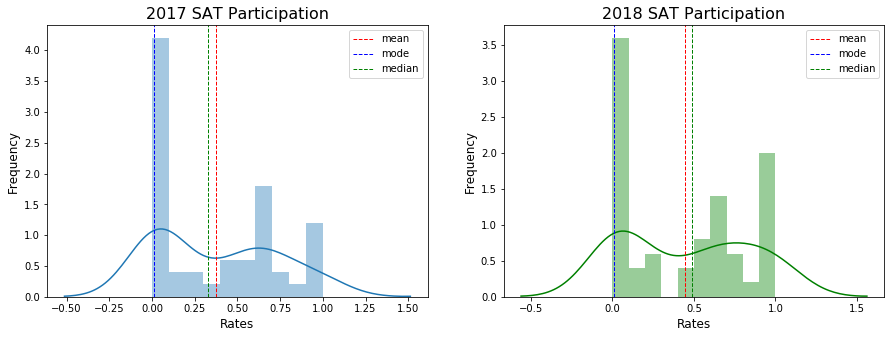

In [107]:
# plot the Figure object
fig = plt.figure(figsize=(15,5))

# SAT 2017 Plot (Normalized)
ax1 = fig.add_subplot(1,2,1)
sns.distplot(normalized["sat_part_2017"],bins=10)
ax1.axvline(normalized["sat_part_2017"].mean(), c='red', linestyle="dashed", linewidth=1, label="mean")
ax1.axvline(normalized["sat_part_2017"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax1.axvline(normalized["sat_part_2017"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2017 SAT Participation", size=16)
ax1.legend();

# SAT 2018 Plot (Normalized)
ax2 = fig.add_subplot(1,2,2)
sns.distplot(normalized["sat_part_2018"],bins=10, color="green")
ax2.axvline(normalized["sat_part_2018"].mean(), c="red", linestyle="dashed", linewidth=1, label="mean")
ax2.axvline(normalized["sat_part_2018"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax2.axvline(normalized["sat_part_2018"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2018 SAT Participation", size=16)
ax2.legend();

### Q2. Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

### <span style="color:red">Answer: </span>
- No, it does not make sense to compare between specific SAT and ACT math scores given that they are both not normally distributed. Any statistical inference derived would be inaccurate.

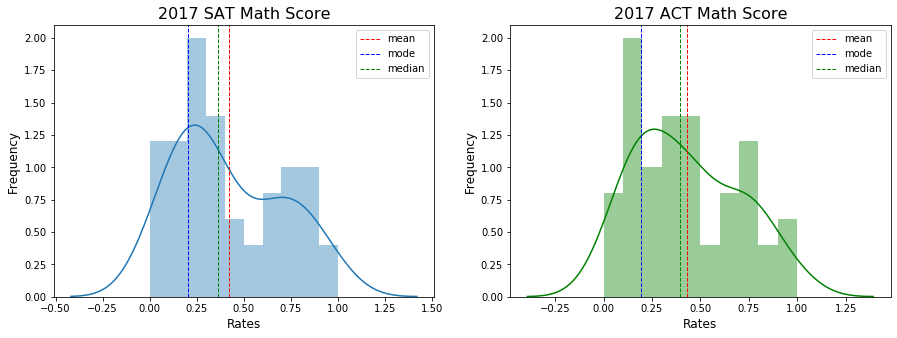

In [108]:
# plot the Figure object
fig = plt.figure(figsize=(15,5))

# SAT 2017 Plot
ax1 = fig.add_subplot(1,2,1)
sns.distplot(normalized["sat_math_2017"],bins=10)
ax1.axvline(normalized["sat_math_2017"].mean(), c='red', linestyle="dashed", linewidth=1, label="mean")
ax1.axvline(normalized["sat_math_2017"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax1.axvline(normalized["sat_math_2017"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2017 SAT Math Score", size=16)
ax1.legend();

# ACT 2017 Plot
ax2 = fig.add_subplot(1,2,2)
sns.distplot(normalized["act_math_2017"],bins=10, color="green")
ax2.axvline(normalized["act_math_2017"].mean(), c="red", linestyle="dashed", linewidth=1, label="mean")
ax2.axvline(normalized["act_math_2017"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax2.axvline(normalized["act_math_2017"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2017 ACT Math Score", size=16)
ax2.legend();

### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

### <span style="color:red">Answer: </span>
- Previously using the Shapiro-Wilk test to assess for the normality of our data, it was found that only the **ACT Reading 2017**, and **ACT Science 2017** scores had p-values > 0.05. 
- This meant that we were unable to reject the null-hypothesis that these distributions were not-normal. A distplot of these two datasets are as plotted below. It would thus be interesting to further investigate if this distribution is truly indeed normal.

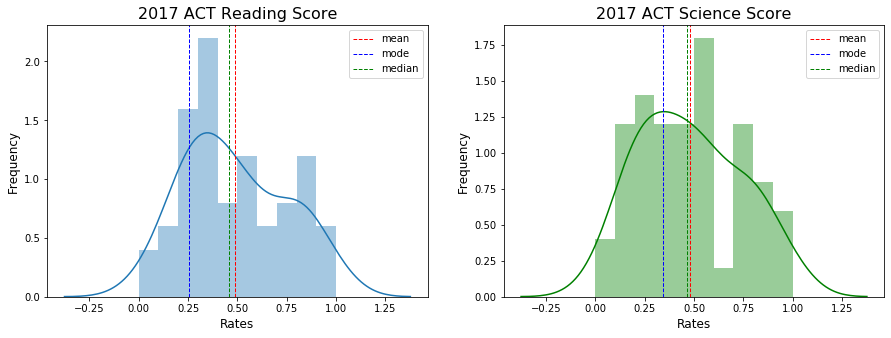

In [96]:
# plot the Figure object
fig = plt.figure(figsize=(15,5))

# ACT Reading 2017 Plot
ax1 = fig.add_subplot(1,2,1)
sns.distplot(normalized["act_read_2017"],bins=10)
ax1.axvline(normalized["act_read_2017"].mean(), c='red', linestyle="dashed", linewidth=1, label="mean")
ax1.axvline(normalized["act_read_2017"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax1.axvline(normalized["act_read_2017"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2017 ACT Reading Score", size=16)
ax1.legend();

# ACT Science 2017 Plot
ax2 = fig.add_subplot(1,2,2)
sns.distplot(normalized["act_sci_2017"],bins=10, color="green")
ax2.axvline(normalized["act_sci_2017"].mean(), c="red", linestyle="dashed", linewidth=1, label="mean")
ax2.axvline(normalized["act_sci_2017"].mode()[0], c='blue', linestyle="dashed", linewidth=1, label="mode")
ax2.axvline(normalized["act_sci_2017"].median(), c='green', linestyle="dashed", linewidth=1, label="median")
plt.xlabel("Rates", size=12)
plt.ylabel("Frequency", size=12)
plt.title("2017 ACT Science Score", size=16)
ax2.legend();

## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

### <span style="color:red">Relationship between SAT and ACT participation rates </span>

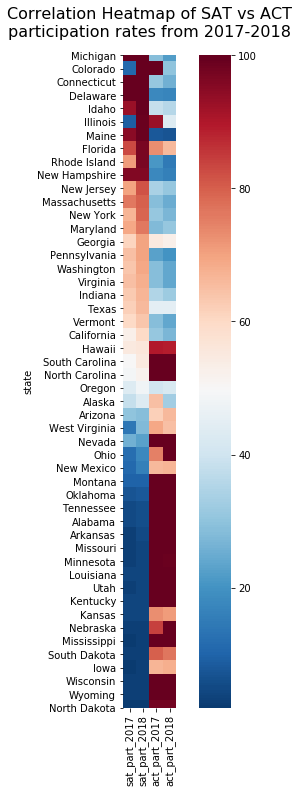

In [109]:
plt.figure(figsize=(8, 12))
plt.title("Correlation Heatmap of SAT vs ACT"
          "\nparticipation rates from 2017-2018", fontsize = 16, y=1.02)

sns.heatmap(final[["sat_part_2017", "sat_part_2018", "act_part_2017", "act_part_2018"]].
            sort_values(by="sat_part_2018", ascending=False), cmap="RdBu_r", center=50, square=True);

### <span style="color:red">Answer: </span>
A heatmap was plotted to observe the relationships between year-on-year SAT and ACT participation rates. The values are sorted based on SAT 2017 participation rates, with states with the highest SAT partipcation being at the rop. The heatmap center point is set at 50% participation.

- Based on the above heatmap and earlier data analysis in this assigment, it is known that several US states already have high SAT participation rates (e.g. Idaho, Colorado, Connecticut, Delaware, Michigan etc). It would hence not make economical sense to further target these states with our SAT advertisement campaigns.

- There are on the other hand, several other states (*bottom of the heatmap*) with very low SAT participation rates. These include the states of North Dakota, Wyoming, Wisconsin, Iowa etc. It would make logical sense to focus our promotion campaigns in these states given the low SAT interest. 

- Notably, several of these low SAT participation states have very high levels of ACT participation. This is due to the state's mandatory requirement of applying ACT testing all junior students, such as the states of North Dakota, Wyoming and Wisconsin. These leaves several non-ACT mandatory states with low SAT participation rates in which our organization may be able to target:
    - Iowa
    - South Dakota
    - Kansas
    - Minnesota
    - Missouri
    - Arkansas
    - Tennessee

### <span style="color:red">Number of SAT eligible high-schools students in 2018</span>
Data is derived from the state-by-state reports in the  "2018 SAT Suite Assessments Annual Report" by the College Board.

<img src="https://tinyurl.com/yxfdbsyh" style="width:800" style="height:800">

In [111]:
# 2018 high-school student population data obtained from the 2018 SAT College Board report

df_highschool_students = pd.read_csv("./data/sat_2018_studentpop.csv")

In [112]:
df_highschool_students.sort_values("High School Students", ascending=False).head()


,State,No of SAT Takers,High School Students,Percentage(%)
4,California,262228,435365,60
42,Texas,226374,341613,66
31,New York,162551,206830,79
8,Florida,176746,181306,97
12,Illinois,145919,146800,99


### <span style="color:red">Answer: </span>

- Among the top 5 states with the largest high-school student population, Florida and Illinois already have close to 100% SAT participation rates. As such, we should not be focusing our efforts to target these states.
- This leaves the states of **New York**, **Texas** and **California** as the three most populous states which have not yet achieved full SAT participation.

### <span style="color:red">Growth projections of future high-schools student numbers in California, Texas and New York.</span>
Data derived from "Knocking at the College Door: Projections of High School Graduates" by Bransberger and Michelau (2016)

#### Growth projection of High-school student numbers in California

<img src="https://tinyurl.com/y4aewbwe" style="width:300" style="height:300">

#### Growth projection of High-school student numbers in Texas

<img src="https://tinyurl.com/y4tuxcxa" style="width:300" style="height:300">

#### Growth projection of High-school student numbers in New York

<img src="https://tinyurl.com/yybfke8g" style="width:300" style="height:300">

### <span style="color:red">Answer: </span>
From the report "Knocking at the College Door: Projections of High School Graduates" by the Western Interstate Commission for Higher Education (Bransberger and Michelau)

- **California**: The number #1 producer of high-school students in the US. However, this number is not projected to increase in the next decade.
- **Texas**: The second highest producer of high-school students. This number is projected to increase for the coming 4-5 years.
- **New York**: The third highest producer of high-school students in the US. The number of high-school student is estimated to remain constant.

### <span style="color:red">A majority of California SAT takers send their reports to universities within California</span>

<img src="https://tinyurl.com/y3lkzhlh" style="width:800" style="height:800">

### <span style="color:red">Answer: </span>
Data is derived from the report "California 2018 SAT Suite Assessments Annual Report" by the College Board.
- Of the 262,228 California students that took the SAT, 198,757 of them requested for their scores to be send to University institutions. 
- While students may designate more than 1 institute to receive their scores, it is interesting to note that a large marjority of California students choose to send their scores to local state public/private colleges. 
- This piece of data may be useful in helping the California Education Board to help formulate policies (i.e. state sponsored SAT tests) which could help encourage local high-school students to attend local colleges.

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?

### <span style="color:red">Key Findings</span>
- **It is proposed that the College Board increase their efforts in targeting high-school students in the state of California**.
- This is due to their large population of annually graduating high-school students, of which lies a sizable 100-150 thousand students (~40%) that have yet to take the SAT. 
- A small percentage increase in SAT participation from California would have a huge numerical increase in student participation number. This is as opposed to lower density US states with much fewer student numbers.
- From a growth projection point of view, it also logical given that California be chosen given that this large student body population is expected to remain the largest in US for the the coming decade.

### <span style="color:red">Recommendations</span>
- To fully develop a comprehensive strategy to help improve SAT enrollment, we propose additional studies to identify and address the underlying concerns affecting SAT participation in Californian high-school students. We propose a three-pronged investigation into the following:

    - **California State Education Policy**: 
        - What are the schemes in place to help high-school students explore college opportunities and their application rates?
        - Are there state-sponsored college scholarships or tuition grants, and do students utilize such resources? 
        - Is there sufficient demand/need to justify implementing mandatory SAT tests for all students?
    - **High-school Students Background**: 
        - How is the receptivity of California High School students towards college education or seeking employment?
        - How do their family backgrounds affect their choices to either work, or attend college? 
        - Are they receptive towards taking an SAT test? 
        - Do they believe that taking the SAT will help improve their chances to getting into college?
    - **College Admission Policy**:
        - How do California state colleges rank potential students for admission?
        - How much does the SAT score impact the student's chances of entering college?
        - What are the schemes in place to help disadvantage students to attend college?

## List of References
1) Bramberger. P. and Michelau. D.K. (2016) "*Knocking at the College Door: Projections of High School Graduates*".

2) College Board. (2018) "*California. 2018 SAT Suite Assessments Annual Report*".

3) College Board. (2018) "*Total Group. 2018 SAT Suite Assessments Annual Report*".

4) SAT Scores (2017) - https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/

5) ACT Scores (2017) - https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows/

6) ACT Scores (2018) - http://www.act.org/content/dam/act/unsecured/documents/cccr2018/Average-Scores-by-State.pdf/ 
